COMP5318 Assignment2

README

For other\_algorithms.ipynb running code, our code is divided into four parts: import data, data preprocessing, model architecture and model fine-tining.

We need to run the import data section first, then run normalisation and increasing background area in data preprocessing, and then train the model. We need to run train data and validation data under model architecture to divide our data set into train and validation data. After that, there are three types of our models, namely alexnet, vggnet and resnet. When you need to verify the parameters of a certain model, you only need to run the corresponding model in model architecture, and then run the corresponding model in model fine-tining.

# 1. Import Data

In [2]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive
id = '1BMXvqjvrF4cm1J5D0AvITo9jgScUrZW9'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('emnist-byclass.mat')

In [1]:
# Download data
from scipy import io as sio
mat = sio.loadmat('emnist-byclass.mat')
data = mat['dataset']

X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(697932, 784)
(116323, 784)


# 2. Data preprocessing

## Normalisation

In [2]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating an object
scaler.fit(X_train) # calculate min and max value of the training data

X_train = scaler.transform(X_train) # apply normalization to the training set

X_test = scaler.transform(X_test) # apply normalization to the test set

## Increasing the Background Area Around the Bodies of the Characters

In [3]:
# Background Area for trainingset
import cv2
import matplotlib.pyplot as plt
import numpy as np

X_train = X_train.reshape((X_train.shape[0],28, 28))
X_train = [cv2.copyMakeBorder(i, 6, 6, 6, 6,borderType=cv2.BORDER_REPLICATE) for i in X_train]
X_train = np.array(X_train)
X_train.shape

(697932, 40, 40)

In [4]:
# Background Area for testset
import cv2
import matplotlib.pyplot as plt
import numpy as np

X_test = X_test.reshape((X_test.shape[0],28, 28))
X_test = [cv2.copyMakeBorder(i, 6, 6, 6, 6,borderType=cv2.BORDER_REPLICATE) for i in X_test]
X_test = np.array(X_test)
X_test.shape

(116323, 40, 40)

# 3. Model architecture

## Train data and validation data

In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Make the notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)
keras.backend.clear_session()

# Set up plotting and figure/axis labels
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# Split data into training set and validation set.
#X_train = X_train.reshape((X_train.shape[0],28, 28))
#X_test = X_test.reshape((X_test.shape[0],28, 28))

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (628138, 40, 40)
Shape of X_valid: (69794, 40, 40)
Shape of X_test: (116323, 40, 40)


In [7]:
# Add an extra dimension to our data
X_train = np.expand_dims(X_train, -1)
X_valid = np.expand_dims(X_valid, -1)
X_test = np.expand_dims(X_test, -1)

print(f"New shape of X_train: {X_train.shape}")

New shape of X_train: (628138, 40, 40, 1)


## Alexnet

In [10]:
# build Alexnet
alexnet_model = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(40, 40, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(48, kernel_size=(3, 3),activation="relu",padding='valid'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
    
    # Conv and pool block 2
    keras.layers.Conv2D(128, kernel_size=(3, 3),activation="relu",padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
    
    # Conv and pool block 3
    keras.layers.Conv2D(filters=192,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.Conv2D(filters=192,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(62, activation="softmax"),
])

## VGG

In [16]:
from tensorflow import keras
# build VGGNet
vgg_model = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(40, 40, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(48, kernel_size=(3, 3), strides = (1,1),activation="relu",padding='same'),
    #keras.layers.Conv2D(48, kernel_size=(3, 3), strides = (1,1),activation="relu",padding='same'), 
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), strides = (1,1),activation="relu",padding='same'),
    #keras.layers.Conv2D(64, kernel_size=(3, 3), strides = (1,1),activation="relu",padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    
    # Conv and pool block 3
    keras.layers.Conv2D(128,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(128,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(128,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    
    # Conv and pool block 4
    keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

    # Conv and pool block 5
    keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    #keras.layers.Conv2D(256,kernel_size=(3,3),strides = (1,1),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(62,activation="softmax"),
])

## Resnet

In [8]:
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D

# build resnet
def conv_block(inputs, filter_num, stride=1):
    
    x = inputs
    x = Conv2D(filter_num[0], (1,1), strides=stride, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filter_num[1], (3,3), strides=1, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filter_num[2], (1,1), strides=1, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    
    # residual connection
    residual = Conv2D(filter_num[2], (1,1), strides=stride, padding='same')(inputs)
    x = layers.add([x, residual])
    x = Activation('relu')(x)

    return x

def build_block (x, filter_num, blocks, stride=1):

    x = conv_block(x, filter_num, stride)

    for i in range(1, blocks):
        x = conv_block(x, filter_num, stride=1)

    return x



def ResNet(Netname, class_num):

    ResNet_Config = { 'ResNet-original':[3,4,6,3],
              'ResNet-base-1':[3,4,6,3],
              'ResNet-base-2':[2,2,2,2],
              'ResNet-base-3':[2,3,3,2]}
    layers_dims=ResNet_Config[Netname]

    filter_block1=[32,32,128]
    filter_block2=[64,64,256]
    filter_block3=[128,128,512]
    filter_block4=[256,256,1024]
    

    img_input = Input(shape=(40,40,1))
    # stem block 
    x = Conv2D(32, (7,7), strides=(2,2),padding='same')(img_input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)
    # convolution block 1-4
    x = build_block(x, filter_block1, layers_dims[0])
    x = build_block(x, filter_block2, layers_dims[1], stride=2)
    x = build_block(x, filter_block3, layers_dims[2], stride=2)
    x = build_block(x, filter_block4, layers_dims[3], stride=2)
    # top layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(class_num, activation='softmax')(x)

    model = models.Model(img_input, x)

    return model


# 4. Model fine-tune

## Alexnet

In [11]:
# Compile alexnet_model with loss, optimiser, and metrics
# Fine-tune according to the design of report
opt = keras.optimizers.Adam(learning_rate=0.0001)

alexnet_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size = 128

In [12]:
"""Running this cell could take several minutes"""
import time
# Train the alexnet_model for 10 epochs
epochs = 10

star_time = time.time()

history = alexnet_model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid, y_valid))

end_time = time.time()

print(end_time-star_time)

Epoch 1/10
4908/4908 [==============================] - 69s 12ms/step - loss: 0.9354 - accuracy: 0.7333 - val_loss: 0.4207 - val_accuracy: 0.8509
Epoch 2/10
4908/4908 [==============================] - 58s 12ms/step - loss: 0.4912 - accuracy: 0.8357 - val_loss: 0.3885 - val_accuracy: 0.8613
Epoch 3/10
4908/4908 [==============================] - 57s 12ms/step - loss: 0.4335 - accuracy: 0.8514 - val_loss: 0.3710 - val_accuracy: 0.8651
Epoch 4/10
4908/4908 [==============================] - 57s 12ms/step - loss: 0.4034 - accuracy: 0.8594 - val_loss: 0.3696 - val_accuracy: 0.8654
Epoch 5/10
4908/4908 [==============================] - 57s 12ms/step - loss: 0.3842 - accuracy: 0.8646 - val_loss: 0.3623 - val_accuracy: 0.8700
Epoch 6/10
4908/4908 [==============================] - 57s 12ms/step - loss: 0.3706 - accuracy: 0.8677 - val_loss: 0.3545 - val_accuracy: 0.8718
Epoch 7/10
4908/4908 [==============================] - 57s 12ms/step - loss: 0.3595 - accuracy: 0.8709 - val_loss: 0.3506 -

In [13]:
# Evaluate the classifier on the test data.
loss, accuracy = alexnet_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

3636/3636 [==============================] - 11s 3ms/step - loss: 0.3479 - accuracy: 0.8760
Accuracy on test data: 0.8760


## VGG

In [17]:
# Compile vgg_model with loss, optimiser, and metrics
# Fine-tune according to the design of report
opt = keras.optimizers.Adam(learning_rate=0.0001)

vgg_model.compile(loss='sparse_categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy'])

batch_size = 64

In [18]:
"""Running this cell could take several minutes"""
import time
# Train the vgg_model for 10 epochs
epochs = 10

star_time = time.time()

history = vgg_model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid, y_valid))

end_time = time.time()

print(end_time-star_time)

Epoch 1/10
9815/9815 [==============================] - 67s 7ms/step - loss: 0.6596 - accuracy: 0.7874 - val_loss: 0.4477 - val_accuracy: 0.8393
Epoch 2/10
9815/9815 [==============================] - 67s 7ms/step - loss: 0.4117 - accuracy: 0.8512 - val_loss: 0.3888 - val_accuracy: 0.8592
Epoch 3/10
9815/9815 [==============================] - 65s 7ms/step - loss: 0.3752 - accuracy: 0.8610 - val_loss: 0.3764 - val_accuracy: 0.8595
Epoch 4/10
9815/9815 [==============================] - 64s 7ms/step - loss: 0.3554 - accuracy: 0.8669 - val_loss: 0.3646 - val_accuracy: 0.8632
Epoch 5/10
9815/9815 [==============================] - 65s 7ms/step - loss: 0.3417 - accuracy: 0.8702 - val_loss: 0.3561 - val_accuracy: 0.8670
Epoch 6/10
9815/9815 [==============================] - 64s 7ms/step - loss: 0.3306 - accuracy: 0.8741 - val_loss: 0.3521 - val_accuracy: 0.8688
Epoch 7/10
9815/9815 [==============================] - 64s 7ms/step - loss: 0.3217 - accuracy: 0.8766 - val_loss: 0.3470 - val_ac

In [ ]:
# Evaluate the classifier on the test data.
loss, accuracy = vgg_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

3636/3636 [==============================] - 10s 3ms/step - loss: 0.6895 - accuracy: 0.8701
Accuracy on test data: 0.8701


## Resnet

In [9]:
# Compile resnet_model with loss, optimiser, and metrics
# Fine-tune according to the design of report

resnet_model = ResNet('ResNet-base-3', 62)
opt = keras.optimizers.Adam(learning_rate=0.0001)
resnet_model.compile(loss='sparse_categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy'])

batch_size = 128

In [10]:
"""Running this cell could take several minutes"""
import time
# Train the model for 10 epochs with batch size 128
epochs = 10

star_time = time.time()

history = resnet_model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid, y_valid))

end_time = time.time()

print(end_time-star_time)

Epoch 1/10
4908/4908 [==============================] - 152s 28ms/step - loss: 0.7490 - accuracy: 0.7628 - val_loss: 0.4885 - val_accuracy: 0.8280
Epoch 2/10
4908/4908 [==============================] - 138s 28ms/step - loss: 0.4229 - accuracy: 0.8471 - val_loss: 0.3990 - val_accuracy: 0.8537
Epoch 3/10
4908/4908 [==============================] - 138s 28ms/step - loss: 0.3822 - accuracy: 0.8583 - val_loss: 0.3902 - val_accuracy: 0.8559
Epoch 4/10
4908/4908 [==============================] - 138s 28ms/step - loss: 0.3601 - accuracy: 0.8648 - val_loss: 0.3911 - val_accuracy: 0.8559
Epoch 5/10
4908/4908 [==============================] - 138s 28ms/step - loss: 0.3451 - accuracy: 0.8692 - val_loss: 0.3647 - val_accuracy: 0.8656
Epoch 6/10
4908/4908 [==============================] - 138s 28ms/step - loss: 0.3330 - accuracy: 0.8730 - val_loss: 0.3598 - val_accuracy: 0.8665
Epoch 7/10
4908/4908 [==============================] - 137s 28ms/step - loss: 0.3230 - accuracy: 0.8757 - val_loss: 0

In [11]:
# Evaluate the classifier on the test data.
loss, accuracy = resnet_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

3636/3636 [==============================] - 26s 7ms/step - loss: 0.3633 - accuracy: 0.8691
Accuracy on test data: 0.8691


## Performance

In [12]:
# Show all kinds of accuracy, recall, f1-score and visualization.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def category_show(model, x_val, y_val):
    target_names = [str(label) for label in range(62)]
    y_pred = model.predict(x_val)
    y_pred = np.argmax(y_pred, axis=-1)
    print(classification_report(y_val, y_pred, target_names=target_names))
    cm = confusion_matrix(y_val, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      5778
           1       0.69      0.90      0.78      6330
           2       0.95      0.98      0.97      5869
           3       0.99      0.99      0.99      5969
           4       0.96      0.98      0.97      5619
           5       0.97      0.92      0.95      5190
           6       0.98      0.98      0.98      5705
           7       0.99      0.99      0.99      6139
           8       0.98      0.98      0.98      5633
           9       0.94      0.97      0.95      5686
          10       0.93      0.98      0.96      1062
          11       0.92      0.97      0.94       648
          12       0.79      0.93      0.85      1739
          13       0.92      0.88      0.90       779
          14       0.95      0.97      0.96       851
          15       0.81      0.85      0.83      1440
          16       0.92      0.88      0.90       447
          17       0.88    

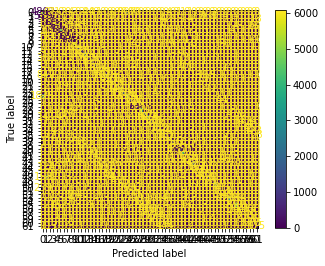

In [13]:
# You can see the performance of different models by changing the test_model type
test_model = resnet_model
outcome = category_show(test_model, X_test, y_test)


# 5. Comparison

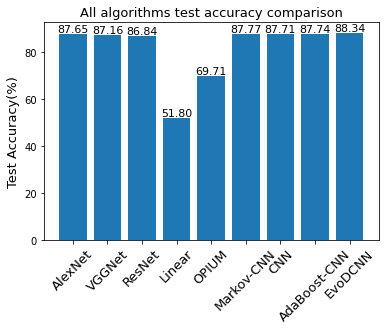

In [14]:
import matplotlib.pyplot as plt
# Compare the test Accuracy of all algorithms using their own best parameters

all_algorithms = ['AlexNet', 'VGGNet', 'ResNet','Linear','OPIUM','Markov-CNN','CNN','AdaBoost-CNN','EvoDCNN']
test_accuracy = [87.65,87.16,86.84,51.80,69.71,87.77,87.71,87.74,88.34]

plt.bar(all_algorithms, test_accuracy)
plt.title('All algorithms test accuracy comparison',fontsize=13)
plt.ylabel('Test Accuracy(%)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)
#plt.ylim(50,90)
for a,b in zip(all_algorithms,test_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('test',bbox_inches = 'tight')

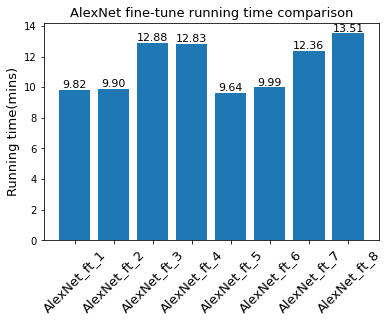

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Compare the running time of Alexnet

all_algorithms = ["AlexNet_ft_1", "AlexNet_ft_2", "AlexNet_ft_3", "AlexNet_ft_4", "AlexNet_ft_5", "AlexNet_ft_6", "AlexNet_ft_7", "AlexNet_ft_8"]
running_time = [9.82, 9.90, 12.88, 12.83, 9.64, 9.99, 12.36, 13.51]

plt.bar(all_algorithms, running_time)
plt.title('AlexNet fine-tune running time comparison',fontsize=13)
plt.ylabel('Running time(mins)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,running_time):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('running time',bbox_inches = 'tight')

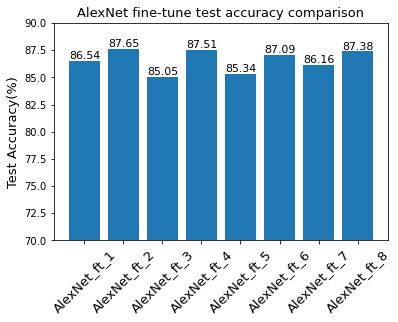

In [ ]:
import matplotlib.pyplot as plt
# Compare the test Accuracy of Alexnet

all_algorithms = ["AlexNet_ft_1", "AlexNet_ft_2", "AlexNet_ft_3", "AlexNet_ft_4", "AlexNet_ft_5", "AlexNet_ft_6", "AlexNet_ft_7", "AlexNet_ft_8"]
test_accuracy = [86.54, 87.65, 85.05, 87.51, 85.34, 87.09, 86.16, 87.38]

plt.bar(all_algorithms, test_accuracy)
plt.title('AlexNet fine-tune test accuracy comparison',fontsize=13)
plt.ylabel('Test Accuracy(%)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)
plt.ylim(70,90)
for a,b in zip(all_algorithms,test_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('test',bbox_inches = 'tight')

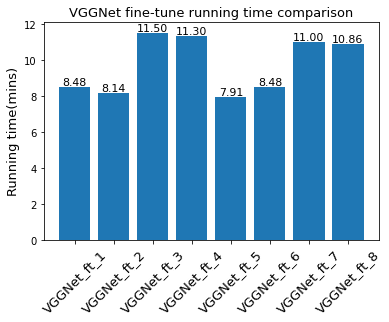

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Compare the running time of VGGNet

all_algorithms = ["VGGNet_ft_1", "VGGNet_ft_2", "VGGNet_ft_3", "VGGNet_ft_4", "VGGNet_ft_5", "VGGNet_ft_6", "VGGNet_ft_7", "VGGNet_ft_8"]
running_time = [8.48, 8.14, 11.50, 11.30, 7.91, 8.48, 11.00, 10.86]

plt.bar(all_algorithms, running_time)
plt.title('VGGNet fine-tune running time comparison',fontsize=13)
plt.ylabel('Running time(mins)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,running_time):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('running time',bbox_inches = 'tight')

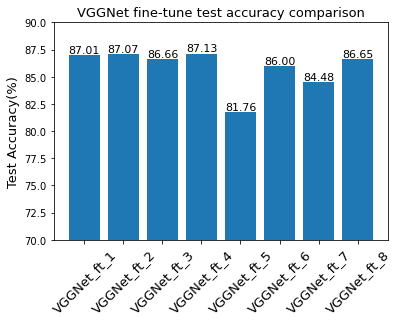

In [ ]:
import matplotlib.pyplot as plt
# Compare the test Accuracy of VGGNet

all_algorithms = ["VGGNet_ft_1", "VGGNet_ft_2", "VGGNet_ft_3", "VGGNet_ft_4", "VGGNet_ft_5", "VGGNet_ft_6", "VGGNet_ft_7", "VGGNet_ft_8"]
test_accuracy = [87.01, 87.07, 86.66, 87.13, 81.76, 86.00, 84.48, 86.65]

plt.bar(all_algorithms, test_accuracy)
plt.title('VGGNet fine-tune test accuracy comparison',fontsize=13)
plt.ylabel('Test Accuracy(%)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)
plt.ylim(70,90)
for a,b in zip(all_algorithms,test_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('test',bbox_inches = 'tight')

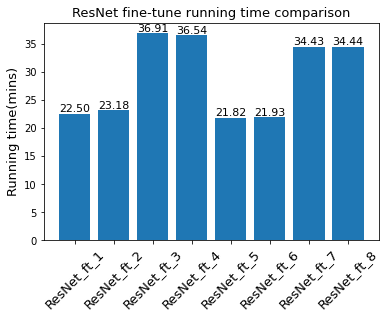

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Compare the running time of ResNet

all_algorithms = ["ResNet_ft_1", "ResNet_ft_2", "ResNet_ft_3", "ResNet_ft_4", "ResNet_ft_5", "ResNet_ft_6", "ResNet_ft_7", "ResNet_ft_8"]
running_time = [22.50, 23.18, 36.91, 36.54, 21.82, 21.93, 34.43, 34.44]

plt.bar(all_algorithms, running_time)
plt.title('ResNet fine-tune running time comparison',fontsize=13)
plt.ylabel('Running time(mins)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)

for a,b in zip(all_algorithms,running_time):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('running time',bbox_inches = 'tight')

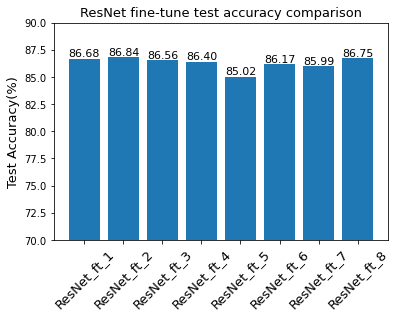

In [ ]:
import matplotlib.pyplot as plt
# Compare the test Accuracy of ResNet

all_algorithms = ["ResNet_ft_1", "ResNet_ft_2", "ResNet_ft_3", "ResNet_ft_4", "ResNet_ft_5", "ResNet_ft_6", "ResNet_ft_7", "ResNet_ft_8"]
test_accuracy = [86.68, 86.84, 86.56, 86.40, 85.02, 86.17, 85.99, 86.75]

plt.bar(all_algorithms, test_accuracy)
plt.title('ResNet fine-tune test accuracy comparison',fontsize=13)
plt.ylabel('Test Accuracy(%)',fontsize=13)
plt.xticks(rotation=45,fontsize=13)
plt.ylim(70,90)
for a,b in zip(all_algorithms,test_accuracy):
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=11);
#plt.savefig('test',bbox_inches = 'tight')

# 6. Hardware and software specifications

In [1]:
! /opt/bin/nvidia-smi

Sun May 22 07:05:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         167G   39G  129G  24% /
tmpfs            64M     0   64M   0% /dev
shm              13G     0   13G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs            13G   36K   13G   1% /var/colab
/dev/sda1       174G   42G  132G  25% /opt/bin/.nvidia
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware


In [ ]:
!cat /proc/meminfo

MemTotal:       26692024 kB
MemFree:        23109044 kB
MemAvailable:   25007164 kB
Buffers:          142100 kB
Cached:          1897820 kB
SwapCached:            0 kB
Active:          1715324 kB
Inactive:        1564840 kB
Active(anon):    1106660 kB
Inactive(anon):      532 kB
Active(file):     608664 kB
Inactive(file):  1564308 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               616 kB
Writeback:             0 kB
AnonPages:       1240360 kB
Mapped:           239368 kB
Shmem:              1208 kB
KReclaimable:      96644 kB
Slab:             167356 kB
SReclaimable:      96644 kB
SUnreclaim:        70712 kB
KernelStack:        5536 kB
PageTables:        17604 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13346012 kB
Committed_AS:    3307200 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       46220 kB
VmallocChunk:          0 kB
Percpu:          